## This notebook is EDA and modifying the CSV. CFB2019_COR runs the correlation tests and multiple linear regressions

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
from IPython.display import display

In [2]:
cfb = pd.read_csv('C:/Users/Jing/Desktop/CFB2019.csv')

In [3]:
cfb.head(3)

,Team,Games,Win-Loss,Off Rank,Off Plays,Off Yards,Off Yards/Play,Off TDs,Off Yards per Game,Def Rank,...,Average Time of Possession per Game,Turnover Rank,Fumbles Recovered,Opponents Intercepted,Turnovers Gain,Fumbles Lost,Interceptions Thrown.y,Turnovers Lost,Turnover Margin,Avg Turnover Margin per Game
0,Air Force (Mountain West),13,11-2,51,881,5483,6.22,55,421.8,17,...,34:28,78,9,7,16,12,6,18,-2,-0.15
1,Akron (MAC),12,0-12,130,725,2918,4.02,14,243.2,83,...,26:29,128,6,5,11,12,14,26,-15,-1.25
2,Alabama (SEC),13,11-2,6,842,6640,7.89,76,510.8,20,...,29:59,3,11,17,28,4,6,10,18,1.38


In [4]:
pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 999)

In [5]:
cfb.shape
# 130 rows, 146 columns in the original data frame

(130, 146)

In [6]:
cfb.head(1)

,Team,Games,Win-Loss,Off Rank,Off Plays,Off Yards,Off Yards/Play,Off TDs,Off Yards per Game,Def Rank,Def Plays,Yards Allowed,Yards/Play Allowed,Off TDs Allowed,Total TDs Allowed,Yards Per Game Allowed,First Down Rank,First Down Runs,First Down Passes,First Down Penalties,First Downs,First Down Def Rank,Opp First Down Runs,Opp First Down Passes,Opp First Down Penalties,Opp First Downs,4th Down Rank,4th Attempts,4th Conversions,4th Percent,4rd Down Def Rank,Opp 4th Conversion,Opp 4th Attempt,Opponent 4th Percent,Kickoff Return Def Rank,Opp Kickoff Returns,Kickoff Touchbacks,Opponent Kickoff Return Yards,Opp Kickoff Return Touchdowns Allowed,Avg Yards per Kickoff Return Allowed,Kickoff Return Rank,Kickoffs Returned,Kickoff Return Yards,Kickoff Return Touchdowns,Avg Yard per Kickoff Return,Passing Off Rank,Pass Attempts,Pass Completions,Interceptions Thrown.x,Pass Yards,Pass Yards/Attempt,Yards/Completion,Pass Touchdowns,Pass Yards Per Game,Pass Def Rank,Opp Completions Allowed,Opp Pass Attempts,Opp Pass Yds Allowed,Opp Pass TDs Allowed,Yards/Attempt Allowed,Yards/Completion Allowed,Pass Yards Per Game Allowed,Penalty Rank,Penalties,Penalty Yards,Penalty Yards Per Game,Punt Return Rank,Punt Returns,Net Punt Return Yards,Punt Return Touchdowns,Avg Yards Per Punt Return,Punt Return Def Rank,Opp Punt Returns,Opp Net Punt Return Yards,Opp Punt Return Touchdowns Allowed,Avg Yards Allowed per Punt Return,Redzone Def Rank,Opp Redzone Attempts,Opp Redzone Rush TD Allowed,Opp Redzone Pass Touchdowns Allowed,Opp Redzone Field Goals Made,Opp Redzone Scores,Redzone Points Allowed,Redzone Off Rank,Redzone Attempts,Redzone Rush TD,Redzone Pass TD,Redzone Field Goals Made,Redzone Scores,Redzone Points,Rushing Def Rank,Opp Rush Attempts,Opp Rush Yards Alloweed,Yds/Rush Allowed,Opp Rush Touchdowns Allowed,Rush Yards Per Game Allowed,Rushing Off Rank,Rush Attempts,Rush Yds,Yards/Rush,Rushing TD,Rushing Yards per Game,Sack Rank,Sacks,Sack Yards,Average Sacks per Game,Scoring Def Rank,Touchdowns Allowed,Opponent Extra Points,2 Point Conversions Allowed,Opp Deflected Extra Points,Opp Feild Goals Made,Opp Safety,Points Allowed,Avg Points per Game Allowed,Scoring Off Rank,Touchdowns,PAT,2 Point Conversions,Defensive Points,Feild Goals,Safety,Total Points,Points Per Game,Tackle for Loss Rank,Solo Tackle For Loss,Assist Tackle For Loss,Tackle for Loss Yards,Total Tackle For Loss,Tackle For Loss Per Game,3rd Down Rank,3rd Attempts,3rd Conversions,3rd Percent,Time of Possession Rank,Time of Possession,Average Time of Possession per Game,Turnover Rank,Fumbles Recovered,Opponents Intercepted,Turnovers Gain,Fumbles Lost,Interceptions Thrown.y,Turnovers Lost,Turnover Margin,Avg Turnover Margin per Game
0,Air Force (Mountain West),13,11-2,51,881,5483,6.22,55,421.8,17,752,4155,5.53,32,34,319.6,45,227,52,7,286,9,77,131,8,216,5,16,21,0.762,44,13,28,0.464,82,36,26,772,0,21.44,129,7,93,0,13.29,125,126,68,6,1602,12.71,23.56,14,123.2,51,238,377,2848,21,7.55,11.97,219.1,2,42,368,28.31,129,5,6,0,1.2,27,7,38,0,5.43,9,43,10,13,8,31,0.721,33,54,39,0,9,48,0.889,7,375,1307,3.49,11,100.5,2,755,3881,5.14,41,298.5,72,26,168,2.0,20,34,27,0,0,9,0,258,19.8,21,58,52,1,1,13,0,443,34.1,125,37,34,247,54,4.2,2,157,84,0.535,2,448:07,34:28,78,9,7,16,12,6,18,-2,-0.15


In [7]:
cfb.loc[cfb.Team.str.contains('Oregon')]

,Team,Games,Win-Loss,Off Rank,Off Plays,Off Yards,Off Yards/Play,Off TDs,Off Yards per Game,Def Rank,Def Plays,Yards Allowed,Yards/Play Allowed,Off TDs Allowed,Total TDs Allowed,Yards Per Game Allowed,First Down Rank,First Down Runs,First Down Passes,First Down Penalties,First Downs,First Down Def Rank,Opp First Down Runs,Opp First Down Passes,Opp First Down Penalties,Opp First Downs,4th Down Rank,4th Attempts,4th Conversions,4th Percent,4rd Down Def Rank,Opp 4th Conversion,Opp 4th Attempt,Opponent 4th Percent,Kickoff Return Def Rank,Opp Kickoff Returns,Kickoff Touchbacks,Opponent Kickoff Return Yards,Opp Kickoff Return Touchdowns Allowed,Avg Yards per Kickoff Return Allowed,Kickoff Return Rank,Kickoffs Returned,Kickoff Return Yards,Kickoff Return Touchdowns,Avg Yard per Kickoff Return,Passing Off Rank,Pass Attempts,Pass Completions,Interceptions Thrown.x,Pass Yards,Pass Yards/Attempt,Yards/Completion,Pass Touchdowns,Pass Yards Per Game,Pass Def Rank,Opp Completions Allowed,Opp Pass Attempts,Opp Pass Yds Allowed,Opp Pass TDs Allowed,Yards/Attempt Allowed,Yards/Completion Allowed,Pass Yards Per Game Allowed,Penalty Rank,Penalties,Penalty Yards,Penalty Yards Per Game,Punt Return Rank,Punt Returns,Net Punt Return Yards,Punt Return Touchdowns,Avg Yards Per Punt Return,Punt Return Def Rank,Opp Punt Returns,Opp Net Punt Return Yards,Opp Punt Return Touchdowns Allowed,Avg Yards Allowed per Punt Return,Redzone Def Rank,Opp Redzone Attempts,Opp Redzone Rush TD Allowed,Opp Redzone Pass Touchdowns Allowed,Opp Redzone Field Goals Made,Opp Redzone Scores,Redzone Points Allowed,Redzone Off Rank,Redzone Attempts,Redzone Rush TD,Redzone Pass TD,Redzone Field Goals Made,Redzone Scores,Redzone Points,Rushing Def Rank,Opp Rush Attempts,Opp Rush Yards Alloweed,Yds/Rush Allowed,Opp Rush Touchdowns Allowed,Rush Yards Per Game Allowed,Rushing Off Rank,Rush Attempts,Rush Yds,Yards/Rush,Rushing TD,Rushing Yards per Game,Sack Rank,Sacks,Sack Yards,Average Sacks per Game,Scoring Def Rank,Touchdowns Allowed,Opponent Extra Points,2 Point Conversions Allowed,Opp Deflected Extra Points,Opp Feild Goals Made,Opp Safety,Points Allowed,Avg Points per Game Allowed,Scoring Off Rank,Touchdowns,PAT,2 Point Conversions,Defensive Points,Feild Goals,Safety,Total Points,Points Per Game,Tackle for Loss Rank,Solo Tackle For Loss,Assist Tackle For Loss,Tackle for Loss Yards,Total Tackle For Loss,Tackle For Loss Per Game,3rd Down Rank,3rd Attempts,3rd Conversions,3rd Percent,Time of Possession Rank,Time of Possession,Average Time of Possession per Game,Turnover Rank,Fumbles Recovered,Opponents Intercepted,Turnovers Gain,Fumbles Lost,Interceptions Thrown.y,Turnovers Lost,Turnover Margin,Avg Turnover Margin per Game
82,Oregon (Pac-12),14,12-2,40,956,6063,6.34,61,433.1,22,973,4607,4.73,23,24,329.1,13,124,170,26,320,73,94,139,34,267,73,13,25,0.520,28,14,33,0.424,118,44,27,1075,1,24.43,8,29,762,2,26.28,41,446,298,6,3615,8.11,12.13,35,258.2,53,297,506,3082,18,6.09,10.38,220.1,103,85,862,61.57,9,18,258,0,14.33,64,26,193,0,7.42,23,39,5,9,16,30,0.769,96,63,21,20,8,49,0.778,13,467,1525,3.27,5,108.9,51,510,2448,4.80,26,174.9,16,41,237,2.93,9,24,21,3,0,20,0,231,16.5,16,67,64,1,0,9,0,495,35.4,26,74,46,384,97,6.9,44,177,74,0.418,103,395:35,28:15,5,7,20,27,5,6,11,16,1.14
83,Oregon St. (Pac-12),12,5-7,58,830,4941,5.95,51,411.8,108,884,5348,6.05,49,52,445.7,66,111,140,17,268,114,114,149,28,291,61,13,24,0.542,128,21,27,0.778,125,34,25,901,1,26.50,48,32,693,0,21.66,43,420,260,4,3061,7.29,11.77,30,255.1,117,262,415,3314,28,7.99,12.65,276.2,86,78,701,58.42,106,13,66,0,5.08,98,23,235,1,10.22,27,51,17,14,9,40,0.784,11,39,16,17,3,36,0.923,79,469,2034,4.34,21,169.5,70,410,1880,4.59,21,156.7,31,32,214,2.67,105,52,45,0,0,11,0,390,32.5,48,52,48,1,0,4,0,374,31.2,20,70,32,356,86,7.2,42,163,69,0.423,100,341:32,28:27,9,8,8,16,2,4,6,10,0.83


In [8]:
# Original df w/o splitting Team, conference, win and loss yet
cfb.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 146 columns):
 #   Column                                 Dtype  
---  ------                                 -----  
 0   Team                                   object 
 1   Games                                  int64  
 2   Win-Loss                               object 
 3   Off Rank                               int64  
 4   Off Plays                              int64  
 5   Off Yards                              int64  
 6   Off Yards/Play                         float64
 7   Off TDs                                int64  
 8   Off Yards per Game                     float64
 9   Def Rank                               int64  
 10  Def Plays                              int64  
 11  Yards Allowed                          int64  
 12  Yards/Play Allowed                     float64
 13  Off TDs Allowed                        int64  
 14  Total TDs Allowed                      int64  
 15  Yards

In [9]:
# Replacing Miami, FL with Miami FL (ACC)
# cfb.loc[cfb.Team.str.contains("Miami")]
cfb.replace(cfb.iloc[57,0],'Miami FL (ACC)',inplace=True)

In [10]:
cfb.loc[cfb.Team.str.contains('Miami')]

,Team,Games,Win-Loss,Off Rank,Off Plays,Off Yards,Off Yards/Play,Off TDs,Off Yards per Game,Def Rank,Def Plays,Yards Allowed,Yards/Play Allowed,Off TDs Allowed,Total TDs Allowed,Yards Per Game Allowed,First Down Rank,First Down Runs,First Down Passes,First Down Penalties,First Downs,First Down Def Rank,Opp First Down Runs,Opp First Down Passes,Opp First Down Penalties,Opp First Downs,4th Down Rank,4th Attempts,4th Conversions,4th Percent,4rd Down Def Rank,Opp 4th Conversion,Opp 4th Attempt,Opponent 4th Percent,Kickoff Return Def Rank,Opp Kickoff Returns,Kickoff Touchbacks,Opponent Kickoff Return Yards,Opp Kickoff Return Touchdowns Allowed,Avg Yards per Kickoff Return Allowed,Kickoff Return Rank,Kickoffs Returned,Kickoff Return Yards,Kickoff Return Touchdowns,Avg Yard per Kickoff Return,Passing Off Rank,Pass Attempts,Pass Completions,Interceptions Thrown.x,Pass Yards,Pass Yards/Attempt,Yards/Completion,Pass Touchdowns,Pass Yards Per Game,Pass Def Rank,Opp Completions Allowed,Opp Pass Attempts,Opp Pass Yds Allowed,Opp Pass TDs Allowed,Yards/Attempt Allowed,Yards/Completion Allowed,Pass Yards Per Game Allowed,Penalty Rank,Penalties,Penalty Yards,Penalty Yards Per Game,Punt Return Rank,Punt Returns,Net Punt Return Yards,Punt Return Touchdowns,Avg Yards Per Punt Return,Punt Return Def Rank,Opp Punt Returns,Opp Net Punt Return Yards,Opp Punt Return Touchdowns Allowed,Avg Yards Allowed per Punt Return,Redzone Def Rank,Opp Redzone Attempts,Opp Redzone Rush TD Allowed,Opp Redzone Pass Touchdowns Allowed,Opp Redzone Field Goals Made,Opp Redzone Scores,Redzone Points Allowed,Redzone Off Rank,Redzone Attempts,Redzone Rush TD,Redzone Pass TD,Redzone Field Goals Made,Redzone Scores,Redzone Points,Rushing Def Rank,Opp Rush Attempts,Opp Rush Yards Alloweed,Yds/Rush Allowed,Opp Rush Touchdowns Allowed,Rush Yards Per Game Allowed,Rushing Off Rank,Rush Attempts,Rush Yds,Yards/Rush,Rushing TD,Rushing Yards per Game,Sack Rank,Sacks,Sack Yards,Average Sacks per Game,Scoring Def Rank,Touchdowns Allowed,Opponent Extra Points,2 Point Conversions Allowed,Opp Deflected Extra Points,Opp Feild Goals Made,Opp Safety,Points Allowed,Avg Points per Game Allowed,Scoring Off Rank,Touchdowns,PAT,2 Point Conversions,Defensive Points,Feild Goals,Safety,Total Points,Points Per Game,Tackle for Loss Rank,Solo Tackle For Loss,Assist Tackle For Loss,Tackle for Loss Yards,Total Tackle For Loss,Tackle For Loss Per Game,3rd Down Rank,3rd Attempts,3rd Conversions,3rd Percent,Time of Possession Rank,Time of Possession,Average Time of Possession per Game,Turnover Rank,Fumbles Recovered,Opponents Intercepted,Turnovers Gain,Fumbles Lost,Interceptions Thrown.y,Turnovers Lost,Turnover Margin,Avg Turnover Margin per Game
57,Miami FL (ACC),13,6-7,98,844,4774,5.66,43,367.2,13,849,4028,4.74,29,30,309.8,84,81,145,27,253,13,83,106,30,219,73,13,25,0.520,123,12,17,0.706,114,28,36,670,0,23.93,69,25,511,0,20.44,52,437,255,10,3239,7.41,12.70,27,249.2,18,208,379,2538,16,6.70,12.20,195.2,93,91,782,60.15,10,21,299,0,14.24,28,24,132,0,5.50,41,36,9,8,12,29,0.806,122,54,13,16,10,39,0.722,17,470,1490,3.17,13,114.6,120,407,1535,3.77,16,118.1,6,46,286,3.54,23,30,28,1,0,17,1,263,20.2,90,43,38,1,0,12,0,334,25.7,4,88,40,442,108,8.3,129,162,44,0.272,62,393:04,30:14,46,10,10,20,7,10,17,3,0.23
58,Miami (OH) (MAC),14,8-6,122,870,4328,4.97,33,309.1,60,1014,5347,5.27,50,52,381.9,114,96,100,20,216,121,142,132,27,301,120,6,17,0.353,62,15,29,0.517,110,16,52,379,0,23.69,52,41,881,0,21.49,111,337,183,10,2495,7.40,13.63,11,178.2,40,259,436,2929,26,6.72,11.31,209.2,44,80,683,48.79,12,23,313,1,13.61,109,26,303,0,11.65,59,51,17,15,10,42,0.824,48,46,18,6,16,40,0.870,81,578,2418,4.18,24,172.7,105,533,1833,3.44,22,130.9,27,38,232,2.71,69,52,49,0,0,11,0,394,28.1,99,37,36,0,0,26,1,338,24.1,13,81,54,428,108,7.7,113,201,67,0.333,107,392:56,28:04,52,9,11,20,8,10,18,2,0.14


In [11]:
# Replacing Miami, OH with Miami OH(MAC)
cfb.replace(cfb.iloc[58,0],'Miami OH (MAC)',inplace=True)

#### Making a separate team column, will combine w/ main cfb later

In [12]:
team = cfb.Team

In [13]:
team

0              Air Force (Mountain West)
1                            Akron (MAC)
2                          Alabama (SEC)
3             Appalachian St. (Sun Belt)
4                       Arizona (Pac-12)
5                   Arizona St. (Pac-12)
6                         Arkansas (SEC)
7                Arkansas St. (Sun Belt)
8      Army West Point (FBS Independent)
9                           Auburn (SEC)
10                        Ball St. (MAC)
11                       Baylor (Big 12)
12             Boise St. (Mountain West)
13                  Boston College (ACC)
14                   Bowling Green (MAC)
15                         Buffalo (MAC)
16                 BYU (FBS Independent)
17                   California (Pac-12)
18                   Central Mich. (MAC)
19                     Charlotte (C-USA)
20                      Cincinnati (AAC)
21                         Clemson (ACC)
22           Coastal Carolina (Sun Belt)
23                     Colorado (Pac-12)
24          Colo

In [14]:
team = team.str.strip()
team = team.str.split('(',expand=True)
# team = team.str.replace(,expand=True)

In [15]:
team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       130 non-null    object
 1   1       130 non-null    object
dtypes: object(2)
memory usage: 2.2+ KB


In [16]:
team

,0,1
0,Air Force,Mountain West)
1,Akron,MAC)
2,Alabama,SEC)
3,Appalachian St.,Sun Belt)
4,Arizona,Pac-12)
5,Arizona St.,Pac-12)
6,Arkansas,SEC)
7,Arkansas St.,Sun Belt)
8,Army West Point,FBS Independent)
9,Auburn,SEC)


#### Making a new conference table, using rsplit to get rid of the extra )

In [17]:
conf = team.iloc[:,1]
conf = conf.str.strip()
conf = conf.str.rsplit(')',expand=True)

In [18]:
conf.drop(columns=[1],inplace=True)

In [19]:
conf

,0
0,Mountain West
1,MAC
2,SEC
3,Sun Belt
4,Pac-12
5,Pac-12
6,SEC
7,Sun Belt
8,FBS Independent
9,SEC


In [20]:
conf.rename(columns={0:'conference'},inplace=True)

In [21]:
team1 = team.copy()
team1.drop(columns=[1],inplace=True)
team1.rename(columns={0:'team'},inplace=True)

#### Splitting wins and losses into two separate columns

In [22]:
wl = cfb['Win-Loss']
wl = wl.str.strip()
wl = wl.str.split('-',expand=True)
wl.rename(columns={0:'win',1:'loss'},inplace=True)

### Redoing the main df, cfb, with the new columns

In [23]:
cfb.drop(columns=['Team'],inplace=True)
cfb.insert(loc=0,column='Team',value=team1.team)
cfb.insert(loc=1,column='Conference',value=conf.conference)
cfb.insert(loc=2,column='Win',value=wl.win)
cfb.insert(loc=3,column='Loss',value=wl.loss)

In [24]:
cfb.drop(columns=['Win-Loss'],inplace=True)
cfb['Win']=pd.to_numeric(cfb['Win'])
cfb['Loss']=pd.to_numeric(cfb['Loss'])

# cfb.insert(loc=5,column='Avg Rank', value=(cfb['Off Rank']+cfb['Def Rank'])/2)
# cfb.insert(loc=6,column='Yard Diff Per Play',value=cfb['Off Yards/Play'] - cfb['Yards/Play Allowed'])

In [25]:
cfb.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 148 columns):
 #   Column                                 Dtype  
---  ------                                 -----  
 0   Team                                   object 
 1   Conference                             object 
 2   Win                                    int64  
 3   Loss                                   int64  
 4   Games                                  int64  
 5   Off Rank                               int64  
 6   Off Plays                              int64  
 7   Off Yards                              int64  
 8   Off Yards/Play                         float64
 9   Off TDs                                int64  
 10  Off Yards per Game                     float64
 11  Def Rank                               int64  
 12  Def Plays                              int64  
 13  Yards Allowed                          int64  
 14  Yards/Play Allowed                     float64
 15  Off T

In [26]:
cfb.shape
# With the new columns, now there is 148 in total

(130, 148)

In [27]:
Penalties = cfb[['Team','Games','Penalty Rank','Penalties','Penalty Yards','Penalty Yards Per Game']].sort_values('Penalty Rank')
# Penalty Rank is done based on Penalty Yards Per Game, not based on the number of penalties. Could potentially drop this column. Going to place penalties as its own table

In [28]:
Penalties.reset_index(inplace=True)

In [29]:
Penalties.drop(columns=['index'],inplace=True)
Penalties

,Team,Games,Penalty Rank,Penalties,Penalty Yards,Penalty Yards Per Game
0,Rice,12,1,44,330,27.50
1,Air Force,13,2,42,368,28.31
2,Iowa,13,3,56,421,32.38
3,Navy,13,4,54,459,35.31
4,Wake Forest,13,5,57,460,35.38
5,Boston College,13,6,66,486,37.38
6,Purdue,12,7,55,452,37.67
7,Iowa St.,13,8,61,496,38.15
8,Army West Point,13,8,60,496,38.15
9,Minnesota,13,10,56,502,38.62


In [30]:
cfb[['Team','Games','Sack Rank','Sack Yards','Average Sacks per Game']].sort_values('Sack Rank')
# Placing sack rank, yards, and avg sacks/game into defense. seems like they are ranked based on higher sack stats

,Team,Games,Sack Rank,Sack Yards,Average Sacks per Game
91,SMU,13,1,320,3.92
85,Pittsburgh,13,1,338,3.92
77,Ohio St.,14,3,354,3.86
30,Florida,13,4,318,3.77
128,Wisconsin,14,5,361,3.64
57,Miami FL,13,6,286,3.54
84,Penn St.,13,7,335,3.46
15,Buffalo,13,8,227,3.31
120,Virginia,14,9,304,3.29
11,Baylor,14,9,255,3.29


In [31]:
cfb[['Team','Games','Turnover Margin','Avg Turnover Margin per Game','Turnovers Lost']]
cfb.rename(columns={'Turnovers Lost': 'Turnovers'})
# Figure out what this means, putting it into Offense df for right now
# Avg Turnover Margin per Game = Turnover Margin / Games
# Will rename Turnsovers Lost, seems redundent, it is showing the number of turnsovers each team had.

# Update found that there's also a Turnovers Gain. That'll be placed in defense, it's causing the turnovers. Turnovers Lost is placed in offense, that's how many times they've lost possession
# Turnover Margin = Turnovers Gain - Turnovers Lost (meaning how many times defense caused a turnover versus how many times a turnover happened to them)
# Turnover Rank is based on avg turnover margin/game. 

,Team,Conference,Win,Loss,Games,Off Rank,Off Plays,Off Yards,Off Yards/Play,Off TDs,Off Yards per Game,Def Rank,Def Plays,Yards Allowed,Yards/Play Allowed,Off TDs Allowed,Total TDs Allowed,Yards Per Game Allowed,First Down Rank,First Down Runs,First Down Passes,First Down Penalties,First Downs,First Down Def Rank,Opp First Down Runs,Opp First Down Passes,Opp First Down Penalties,Opp First Downs,4th Down Rank,4th Attempts,4th Conversions,4th Percent,4rd Down Def Rank,Opp 4th Conversion,Opp 4th Attempt,Opponent 4th Percent,Kickoff Return Def Rank,Opp Kickoff Returns,Kickoff Touchbacks,Opponent Kickoff Return Yards,Opp Kickoff Return Touchdowns Allowed,Avg Yards per Kickoff Return Allowed,Kickoff Return Rank,Kickoffs Returned,Kickoff Return Yards,Kickoff Return Touchdowns,Avg Yard per Kickoff Return,Passing Off Rank,Pass Attempts,Pass Completions,Interceptions Thrown.x,Pass Yards,Pass Yards/Attempt,Yards/Completion,Pass Touchdowns,Pass Yards Per Game,Pass Def Rank,Opp Completions Allowed,Opp Pass Attempts,Opp Pass Yds Allowed,Opp Pass TDs Allowed,Yards/Attempt Allowed,Yards/Completion Allowed,Pass Yards Per Game Allowed,Penalty Rank,Penalties,Penalty Yards,Penalty Yards Per Game,Punt Return Rank,Punt Returns,Net Punt Return Yards,Punt Return Touchdowns,Avg Yards Per Punt Return,Punt Return Def Rank,Opp Punt Returns,Opp Net Punt Return Yards,Opp Punt Return Touchdowns Allowed,Avg Yards Allowed per Punt Return,Redzone Def Rank,Opp Redzone Attempts,Opp Redzone Rush TD Allowed,Opp Redzone Pass Touchdowns Allowed,Opp Redzone Field Goals Made,Opp Redzone Scores,Redzone Points Allowed,Redzone Off Rank,Redzone Attempts,Redzone Rush TD,Redzone Pass TD,Redzone Field Goals Made,Redzone Scores,Redzone Points,Rushing Def Rank,Opp Rush Attempts,Opp Rush Yards Alloweed,Yds/Rush Allowed,Opp Rush Touchdowns Allowed,Rush Yards Per Game Allowed,Rushing Off Rank,Rush Attempts,Rush Yds,Yards/Rush,Rushing TD,Rushing Yards per Game,Sack Rank,Sacks,Sack Yards,Average Sacks per Game,Scoring Def Rank,Touchdowns Allowed,Opponent Extra Points,2 Point Conversions Allowed,Opp Deflected Extra Points,Opp Feild Goals Made,Opp Safety,Points Allowed,Avg Points per Game Allowed,Scoring Off Rank,Touchdowns,PAT,2 Point Conversions,Defensive Points,Feild Goals,Safety,Total Points,Points Per Game,Tackle for Loss Rank,Solo Tackle For Loss,Assist Tackle For Loss,Tackle for Loss Yards,Total Tackle For Loss,Tackle For Loss Per Game,3rd Down Rank,3rd Attempts,3rd Conversions,3rd Percent,Time of Possession Rank,Time of Possession,Average Time of Possession per Game,Turnover Rank,Fumbles Recovered,Opponents Intercepted,Turnovers Gain,Fumbles Lost,Interceptions Thrown.y,Turnovers,Turnover Margin,Avg Turnover Margin per Game
0,Air Force,Mountain West,11,2,13,51,881,5483,6.22,55,421.8,17,752,4155,5.53,32,34,319.6,45,227,52,7,286,9,77,131,8,216,5,16,21,0.762,44,13,28,0.464,82,36,26,772,0,21.44,129,7,93,0,13.29,125,126,68,6,1602,12.71,23.56,14,123.2,51,238,377,2848,21,7.55,11.97,219.1,2,42,368,28.31,129,5,6,0,1.20,27,7,38,0,5.43,9,43,10,13,8,31,0.721,33,54,39,0,9,48,0.889,7,375,1307,3.49,11,100.5,2,755,3881,5.14,41,298.5,72,26,168,2.00,20,34,27,0,0,9,0,258,19.8,21,58,52,1,1,13,0,443,34.1,125,37,34,247,54,4.2,2,157,84,0.535,2,448:07,34:28,78,9,7,16,12,6,18,-2,-0.15
1,Akron,MAC,0,12,12,130,725,2918,4.02,14,243.2,83,871,4967,5.70,51,56,413.9,130,51,91,13,155,58,138,106,17,261,124,7,22,0.318,74,8,15,0.533,1,15,13,223,0,14.87,53,40,859,0,21.48,100,398,205,14,2347,5.90,11.45,12,195.6,29,201,305,2405,23,7.89,11.97,200.4,62,80,626,52.17,117,12,46,0,3.83,31,23,129,0,5.61,77,58,26,15,8,49,0.845,128,26,2,9,7,18,0.692,116,566,2562,4.53,28,213.5,130,327,571,1.75,2,47.6,130,10,61,0.83,122,56,55,1,0,14,0,435,36.3,130,15,13,1,0,7,0,126,10.5,124,37,28,147,51,4.3,130,163,43,0.264,122,317:52,26:29,128,6,5,11,12,14,26,-15,-1.25
2,Alabama,SEC,11,2,13,6,842,6640,7.89,76,510.8,20,877,4218,4.81,24,26,324.5,15,126,168,24,318,40,95,121,31,247,12,13,19,0.684,11,7,19,0.368,11,27,35,469,0,17.37,55,30,637,1,21

In [32]:
offense = cfb.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,18,19,20,21,22,28,29,30,31,47,48,49,50,
                     51,52,53,54,55,85,86,87,88,89,90,91,98,99,100,101,102,103,117,118,119,120,122,123,124,
                      125,132,133,134,135,136,137,138,139,141,143,144,145,146,147]].copy()

defense = cfb.iloc[:,[0,1,2,3,4,11,12,13,14,15,16,17,23,24,25,26,27,32,33,34,35,56,57,58,59,60,61,62,63,78,
                     79,80,81,82,83,84,92,93,94,95,96,97,104,105,106,107,108,109,110,111,112,113,114,115,
                     116,121,126,127,128,129,130,131,140,142]].copy()
special = cfb.iloc[:,[0,1,2,3,4,36,37,38,39,40,41,42,43,44,45,46,68,69,70,71,72,73,74,75,76,77]].copy()
# offense1 = cfb.iloc[:,18:22].copy()
# offense2 = cfb.iloc[:,28:31].copy()
# offense3

In [33]:
offense.insert(loc=5,column='Avg Rank', value=(cfb['Off Rank']+cfb['Def Rank'])/2)
offense.insert(loc=6,column='Yard Diff Per Play',value=cfb['Off Yards/Play'] - cfb['Yards/Play Allowed'])

defense.insert(loc=5,column='Avg Rank', value=(cfb['Off Rank']+cfb['Def Rank'])/2)
defense.insert(loc=6,column='Yard Diff Per Play',value=cfb['Off Yards/Play'] - cfb['Yards/Play Allowed'])

special.insert(loc=5,column='Avg Rank', value=(cfb['Off Rank']+cfb['Def Rank'])/2)
special.insert(loc=6,column='Yard Diff Per Play',value=cfb['Off Yards/Play'] - cfb['Yards/Play Allowed'])

### Working with 4 different tables, for right now. 
- Offense
- Defense
- Special (teams)
- Penalties

In [34]:
# Begin exploring offense data first
offense.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 66 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Team                                 130 non-null    object 
 1   Conference                           130 non-null    object 
 2   Win                                  130 non-null    int64  
 3   Loss                                 130 non-null    int64  
 4   Games                                130 non-null    int64  
 5   Avg Rank                             130 non-null    float64
 6   Yard Diff Per Play                   130 non-null    float64
 7   Off Rank                             130 non-null    int64  
 8   Off Plays                            130 non-null    int64  
 9   Off Yards                            130 non-null    int64  
 10  Off Yards/Play                       130 non-null    float64
 11  Off TDs                         

In [35]:
offense.describe()

,Win,Loss,Games,Avg Rank,Yard Diff Per Play,Off Rank,Off Plays,Off Yards,Off Yards/Play,Off TDs,Off Yards per Game,First Down Rank,First Down Runs,First Down Passes,First Down Penalties,First Downs,4th Down Rank,4th Attempts,4th Conversions,4th Percent,Passing Off Rank,Pass Attempts,Pass Completions,Interceptions Thrown.x,Pass Yards,Pass Yards/Attempt,Yards/Completion,Pass Touchdowns,Pass Yards Per Game,Redzone Off Rank,Redzone Attempts,Redzone Rush TD,Redzone Pass TD,Redzone Field Goals Made,Redzone Scores,Redzone Points,Rushing Off Rank,Rush Attempts,Rush Yds,Yards/Rush,Rushing TD,Rushing Yards per Game,Scoring Off Rank,Touchdowns,PAT,2 Point Conversions,Feild Goals,Safety,Total Points,Points Per Game,3rd Down Rank,3rd Attempts,3rd Conversions,3rd Percent,Time of Possession Rank,Turnover Rank,Opponents Intercepted,Fumbles Lost,Interceptions Thrown.y,Turnovers Lost,Turnover Margin,Avg Turnover Margin per Game
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,6.807692,5.976923,12.784615,65.492308,0.146385,65.492308,885.953846,5167.538462,5.801385,44.307692,402.531538,65.084615,115.353846,130.192308,22.646154,268.192308,64.869231,11.292308,21.246154,0.523885,65.492308,397.884615,241.315385,9.976923,2992.053846,7.533231,12.586154,21.946154,233.193846,65.261538,48.300000,17.815385,11.969231,10.730769,40.515385,0.832562,65.476923,488.069231,2175.484615,4.380769,22.361538,169.343846,65.338462,46.646154,43.015385,0.953846,14.823077,0.261538,369.884615,28.686154,65.430769,179.353846,71.784615,0.399462,65.492308,64.323077,10.353846,8.200000,9.976923,18.176923,0.323077,0.012385
std,3.132961,2.504153,0.757235,27.241739,1.084415,37.675326,76.366300,953.227688,0.723159,14.224036,59.019327,37.614329,32.567131,36.515919,5.891607,44.662576,37.624087,4.902849,6.796102,0.122712,37.668947,87.998735,66.985598,3.652472,836.741236,1.263480,1.978133,9.551421,59.672631,37.702745,11.168651,7.088351,6.175644,4.072575,10.946830,0.071680,37.663795,88.014198,687.270979,0.765551,9.091272,49.670291,37.697604,14.704775,14.564470,1.140254,5.300966,0.521683,105.115118,6.937202,37.674645,15.491364,12.404041,0.055055,37.669153,37.651238,3.593408,2.963342,3.652472,4.584208,7.545434,0.586483
min,0.000000,0.000000,12.000000,2.500000,-3.490000,1.000000,717.000000,2918.000000,4.020000,14.000000,243.200000,1.000000,51.000000,38.000000,7.000000,155.000000,1.000000,2.000000,7.000000,0.167000,1.000000,104.000000,55.000000,1.000000,968.000000,4.500000,9.000000,5.000000,74.500000,1.000000,21.000000,2.000000,0.000000,2.000000,15.000000,0.593000,1.000000,210.000000,571.000000,1.750000,2.000000,47.600000,1.000000,15.000000,13.000000,0.000000,2.000000,0.000000,126.000000,10.500000,1.000000,141.000000,43.000000,0.264000,1.000000,1.000000,4.000000,2.000000,1.000000,6.000000,-15.000000,-1.250000
25%,4.000000,5.000000,12.000000,46.500000,-0.547500,33.250000,841.000000,4580.250000,5.312500,34.000000,367.375000,32.000000,92.250000,108.250000,19.000000,239.500000,33.000000,7.000000,16.000000,0.430500,33.250000,339.750000,200.500000,8.000000,2479.250000,6.790000,11.527500,15.000000,198.225000,33.000000,40.000000,12.000000,8.000000,8.000000,33.000000,0.778000,33.250000,433.250000,1711.750000,3.820000,16.000000,137.300000,31.000000,36.000000,33.250000,0.000000,11.000000,0.000000,303.250000,24.200000,33.250000,168.000000,64.000000,0.365500,33.250000,33.000

In [36]:
offense.shape
# 130 rows, 66 columns

(130, 66)

In [37]:
offense.head(5)

,Team,Conference,Win,Loss,Games,Avg Rank,Yard Diff Per Play,Off Rank,Off Plays,Off Yards,Off Yards/Play,Off TDs,Off Yards per Game,First Down Rank,First Down Runs,First Down Passes,First Down Penalties,First Downs,4th Down Rank,4th Attempts,4th Conversions,4th Percent,Passing Off Rank,Pass Attempts,Pass Completions,Interceptions Thrown.x,Pass Yards,Pass Yards/Attempt,Yards/Completion,Pass Touchdowns,Pass Yards Per Game,Redzone Off Rank,Redzone Attempts,Redzone Rush TD,Redzone Pass TD,Redzone Field Goals Made,Redzone Scores,Redzone Points,Rushing Off Rank,Rush Attempts,Rush Yds,Yards/Rush,Rushing TD,Rushing Yards per Game,Scoring Off Rank,Touchdowns,PAT,2 Point Conversions,Feild Goals,Safety,Total Points,Points Per Game,3rd Down Rank,3rd Attempts,3rd Conversions,3rd Percent,Time of Possession Rank,Time of Possession,Average Time of Possession per Game,Turnover Rank,Opponents Intercepted,Fumbles Lost,Interceptions Thrown.y,Turnovers Lost,Turnover Margin,Avg Turnover Margin per Game
0,Air Force,Mountain West,11,2,13,34.0,0.69,51,881,5483,6.22,55,421.8,45,227,52,7,286,5,16,21,0.762,125,126,68,6,1602,12.71,23.56,14,123.2,33,54,39,0,9,48,0.889,2,755,3881,5.14,41,298.5,21,58,52,1,13,0,443,34.1,2,157,84,0.535,2,448:07,34:28,78,7,12,6,18,-2,-0.15
1,Akron,MAC,0,12,12,106.5,-1.68,130,725,2918,4.02,14,243.2,130,51,91,13,155,124,7,22,0.318,100,398,205,14,2347,5.90,11.45,12,195.6,128,26,2,9,7,18,0.692,130,327,571,1.75,2,47.6,130,15,13,1,7,0,126,10.5,130,163,43,0.264,122,317:52,26:29,128,5,12,14,26,-15,-1.25
2,Alabama,SEC,11,2,13,13.0,3.08,6,842,6640,7.89,76,510.8,15,126,168,24,318,12,13,19,0.684,3,406,287,6,4449,10.96,15.50,49,342.2,64,62,22,21,9,52,0.839,56,436,2191,5.03,27,168.5,2,83,80,0,12,0,614,47.2,3,153,80,0.523,70,389:58,29:59,3,17,4,6,10,18,1.38
3,Appalachian St.,Sun Belt,13,1,14,32.5,1.25,39,969,6064,6.26,65,433.1,32,151,124,20,295,1,13,16,0.813,93,370,231,6,2824,7.63,12.23,30,201.7,14,60,25,22,8,55,0.917,16,599,3240,5.41,35,231.4,9,73,72,0,11,0,543,38.8,26,200,89,0.445,36,438:26,31:19,7,14,3,6,9,15,1.07
4,Arizona,Pac-12,4,8,12,75.0,-0.31,30,873,5281,6.05,42,440.1,63,111,139,20,270,19,13,20,0.650,35,422,261,12,3193,7.57,12.23,23,266.1,53,35,12,10,8,30,0.857,52,451,2088,4.63,19,174.0,77,42,37,1,10,1,323,26.9,28,186,82,0.441,115,328:53,27:24,89,11,6,12,18,-3,-0.25


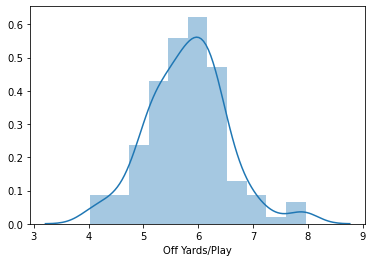

In [38]:
sns.distplot(offense['Off Yards/Play'])
# Seems fairly normally distributed. 5.8 yds per play is mean

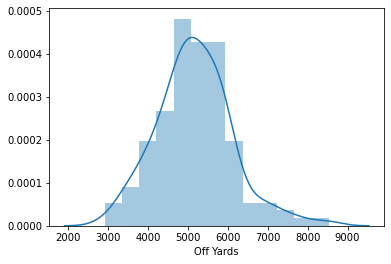

In [39]:
sns.distplot(offense['Off Yards'])

In [40]:
# Moving offense rank to the beginning of the table
offense= offense[['Off Rank'] + [col for col in offense.columns if col != 'Off Rank' ] ]

In [41]:
offense.sort_values('Off Rank',inplace=True)

In [42]:
offense.head(25)
# Off Rank is based on Off Yards / Game

,Off Rank,Team,Conference,Win,Loss,Games,Avg Rank,Yard Diff Per Play,Off Plays,Off Yards,Off Yards/Play,Off TDs,Off Yards per Game,First Down Rank,First Down Runs,First Down Passes,First Down Penalties,First Downs,4th Down Rank,4th Attempts,4th Conversions,4th Percent,Passing Off Rank,Pass Attempts,Pass Completions,Interceptions Thrown.x,Pass Yards,Pass Yards/Attempt,Yards/Completion,Pass Touchdowns,Pass Yards Per Game,Redzone Off Rank,Redzone Attempts,Redzone Rush TD,Redzone Pass TD,Redzone Field Goals Made,Redzone Scores,Redzone Points,Rushing Off Rank,Rush Attempts,Rush Yds,Yards/Rush,Rushing TD,Rushing Yards per Game,Scoring Off Rank,Touchdowns,PAT,2 Point Conversions,Feild Goals,Safety,Total Points,Points Per Game,3rd Down Rank,3rd Attempts,3rd Conversions,3rd Percent,Time of Possession Rank,Time of Possession,Average Time of Possession per Game,Turnover Rank,Opponents Intercepted,Fumbles Lost,Interceptions Thrown.y,Turnovers Lost,Turnover Margin,Avg Turnover Margin per Game
52,1,LSU,SEC,15,0,15,16.0,2.79,1080,8527,7.90,93,568.5,1,151,243,24,418,14,6,9,0.667,2,567,426,7,6024,10.62,14.14,61,401.6,2,75,25,34,13,72,0.960,60,513,2503,4.88,32,166.9,1,95,89,1,21,1,726,48.4,4,183,91,0.497,53,455:44,30:22,15,17,5,7,12,10,0.67
111,2,UCF,AAC,10,3,13,17.0,2.35,1016,7026,6.92,70,540.5,8,154,143,36,333,47,19,33,0.576,8,457,271,8,4117,9.01,15.19,36,316.7,90,57,20,13,12,45,0.789,19,559,2909,5.20,34,223.8,5,74,71,1,15,1,564,43.4,61,200,81,0.405,123,344:14,26:28,27,13,7,8,15,6,0.46
78,3,Oklahoma,Big 12,12,2,14,20.5,2.33,946,7527,7.96,74,537.6,6,160,172,16,348,14,8,12,0.667,18,381,262,9,4164,10.93,15.89,36,297.4,13,73,30,22,15,67,0.918,14,565,3363,5.95,38,240.2,6,76,75,1,19,0,590,42.1,5,155,77,0.497,39,434:30,31:02,109,7,10,9,19,-8,-0.57
77,4,Ohio St.,Big Ten,13,1,14,2.5,2.81,1069,7419,6.94,87,529.9,2,192,172,33,397,25,8,13,0.615,36,406,271,3,3684,9.07,13.59,48,263.1,30,75,30,29,8,67,0.893,5,663,3735,5.63,39,266.8,3,88,87,0,13,1,656,46.9,1,183,101,0.552,25,447:31,31:57,17,15,13,3,16,9,0.64
21,5,Clemson,ACC,14,1,15,5.5,2.92,1075,7931,7.38,85,528.7,3,166,190,37,393,77,6,12,0.500,23,509,326,10,4325,8.50,13.27,40,288.3,40,67,33,18,8,59,0.881,13,566,3606,6.37,45,240.4,4,88,85,2,14,0,659,43.9,27,181,80,0.442,61,453:49,30:15,8,19,5,10,15,15,1.00
2,6,Alabama,SEC,11,2,13,13.0,3.08,842,6640,7.89,76,510.8,15,126,168,24,318,12,13,19,0.684,3,406,287,6,4449,10.96,15.50,49,342.2,64,62,22,21,9,52,0.839,56,436,2191,5.03,27,168.5,2,83,80,0,12,0,614,47.2,3,153,80,0.523,70,389:58,29:59,3,17,4,6,10,18,1.38
124,7,Washington St.,Pac-12,6,7,13,59.0,0.50,920,6568,7.14,62,505.2,7,54,258,23,335,38,13,22,0.591,1,710,505,16,5683,8.00,11.25,50,437.2,52,71,10,35,16,61,0.859,129,210,885,4.21,12,68.1,11,62,55,1,20,0,491,37.8,39,141,60,0.426,80,381:23,29:20,100,10,9,16,25,-6,-0.46
49,8,Louisiana,Sun Belt,11,3,14,27.5,1.56,987,6918,7.01,69,494.1,5,179,153,19,351,66,9,17,0.529,62,413,268,4,3314,8.02,12.37,27,236.7,46,70,29,19,13,61,0.871,6,574,3604,6.28,42,257.4,10,69,67,0,16,1,531,37.9,11,168,80,0.476,67,420:39,30:02,37,10,10,4,14,5,0.36
91,9,SMU,AAC,10,3,13,58.0,0.38,1037,6368,6.14,70,489.8,12,119,162,41,322,6,22,30,0.733,13,503,313,11,4017,7.99,12.83,35,309.0,107,72,25,19,11,55,0.764,43,534,2351,4.40,35,180.8,7,73,58,6,12,0,544,41.8,30,212,93,0.439,94,375:20,28:52,40,9,6,11,17,4,0.31
56,10,Memphis,AAC,12,2,14,35.5,1.48,992,6791,6.85,65,485.1,10,135,161,31,327,43,14,24,0.583,17,441,281,11,4177,9.47,14.86,33,298.4,77,61,21,16,13,50,0.820,39,551,2614,4.74,32,186.7,8,71,65,1,23,1,566,40.4,19,193,89,0.461,50,427:25,30:31,69,11,9,11,20,-1,-0.07


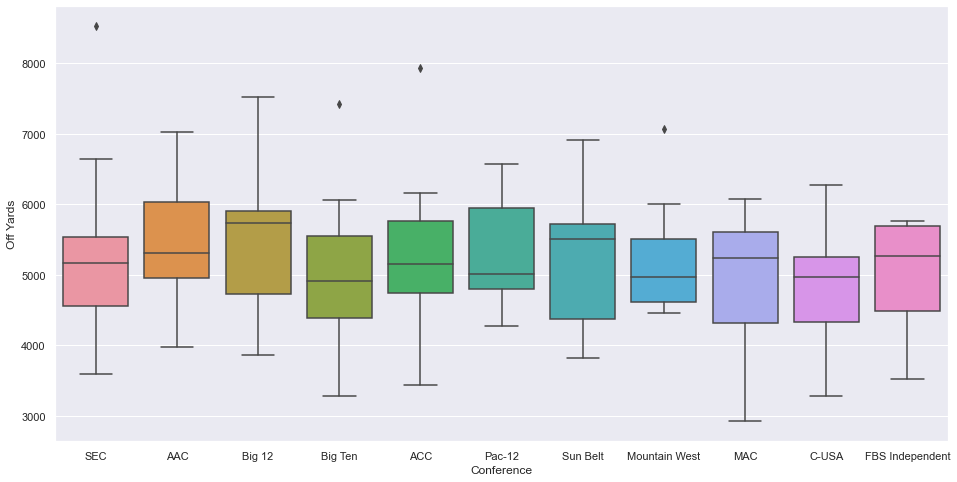

In [43]:
sns.set(rc={'figure.figsize': (16,8)})

sns.boxplot(x='Conference',y='Off Yards',width=0.8,dodge=True,data=offense)

In [44]:
defense.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 66 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Team                                 130 non-null    object 
 1   Conference                           130 non-null    object 
 2   Win                                  130 non-null    int64  
 3   Loss                                 130 non-null    int64  
 4   Games                                130 non-null    int64  
 5   Avg Rank                             130 non-null    float64
 6   Yard Diff Per Play                   130 non-null    float64
 7   Def Rank                             130 non-null    int64  
 8   Def Plays                            130 non-null    int64  
 9   Yards Allowed                        130 non-null    int64  
 10  Yards/Play Allowed                   130 non-null    float64
 11  Off TDs Allowed                 

In [45]:
defense= defense[['Def Rank'] + [col for col in defense.columns if col != 'Def Rank' ]]

In [46]:
defense.sort_values('Def Rank',inplace=True)
# Def Rank is based on Yards Per Game Allowed

In [47]:
defense.head(25)

,Def Rank,Team,Conference,Win,Loss,Games,Avg Rank,Yard Diff Per Play,Def Plays,Yards Allowed,Yards/Play Allowed,Off TDs Allowed,Total TDs Allowed,Yards Per Game Allowed,First Down Def Rank,Opp First Down Runs,Opp First Down Passes,Opp First Down Penalties,Opp First Downs,4rd Down Def Rank,Opp 4th Conversion,Opp 4th Attempt,Opponent 4th Percent,Pass Def Rank,Opp Completions Allowed,Opp Pass Attempts,Opp Pass Yds Allowed,Opp Pass TDs Allowed,Yards/Attempt Allowed,Yards/Completion Allowed,Pass Yards Per Game Allowed,Redzone Def Rank,Opp Redzone Attempts,Opp Redzone Rush TD Allowed,Opp Redzone Pass Touchdowns Allowed,Opp Redzone Field Goals Made,Opp Redzone Scores,Redzone Points Allowed,Rushing Def Rank,Opp Rush Attempts,Opp Rush Yards Alloweed,Yds/Rush Allowed,Opp Rush Touchdowns Allowed,Rush Yards Per Game Allowed,Sack Rank,Sacks,Sack Yards,Average Sacks per Game,Scoring Def Rank,Touchdowns Allowed,Opponent Extra Points,2 Point Conversions Allowed,Opp Deflected Extra Points,Opp Feild Goals Made,Opp Safety,Points Allowed,Avg Points per Game Allowed,Defensive Points,Tackle for Loss Rank,Solo Tackle For Loss,Assist Tackle For Loss,Tackle for Loss Yards,Total Tackle For Loss,Tackle For Loss Per Game,Fumbles Recovered,Turnovers Gain
77,1,Ohio St.,Big Ten,13,1,14,2.5,2.81,881,3636,4.13,23,23,259.7,11,99,89,29,217,7,7,20,0.350,1,200,393,2184,9,5.56,10.92,156.0,2,29,10,2,7,19,0.655,9,488,1452,2.98,14,103.7,3,54,354,3.86,4,23,19,3,0,9,1,192,13.7,0,2,105,38,494,124,8.9,10,25
115,2,Utah,Pac-12,11,3,14,25.0,1.95,813,3769,4.64,25,25,269.2,6,71,116,21,208,82,12,22,0.545,13,247,436,2624,16,6.02,10.62,187.4,15,31,6,8,9,23,0.742,3,377,1145,3.04,9,81.8,53,33,240,2.36,6,25,23,1,0,11,1,210,15.0,0,72,64,34,369,81,5.8,8,22
34,3,Georgia,SEC,12,2,14,32.0,1.79,900,3860,4.29,18,20,275.7,14,69,127,26,222,1,6,23,0.261,31,285,501,2815,16,5.62,9.88,201.1,13,26,2,11,6,19,0.731,1,399,1045,2.62,2,74.6,60,31,229,2.21,1,20,20,0,0,12,0,176,12.6,0,89,59,34,349,76,5.4,8,16
128,4,Wisconsin,Big Ten,10,4,14,21.0,1.51,839,4020,4.79,29,30,287.1,23,78,121,28,227,37,12,27,0.444,12,214,415,2623,18,6.32,12.26,187.4,11,36,9,11,6,26,0.722,6,424,1397,3.29,11,99.8,5,51,361,3.64,10,30,25,1,0,10,0,237,16.9,0,38,81,20,444,91,6.5,10,22
89,5,San Diego St.,Mountain West,10,3,13,57.5,0.13,804,3741,4.65,18,19,287.8,3,67,114,17,198,30,9,21,0.429,44,265,448,2761,10,6.16,10.42,212.4,16,32,7,8,9,24,0.750,2,356,980,2.75,8,75.4,49,31,193,2.38,2,19,17,2,0,10,0,165,12.7,0,45,60,44,316,82,6.3,9,27
21,6,Clemson,ACC,14,1,15,5.5,2.92,970,4325,4.46,24,24,288.3,12,92,108,18,218,33,10,23,0.435,4,231,433,2584,14,5.97,11.19,172.3,19,33,7,7,11,25,0.758,19,537,1741,3.24,10,116.1,13,46,307,3.07,3,24,23,0,0,12,0,203,13.5,0,7,87,64,504,119,7.9,11,30
15,7,Buffalo,MAC,8,5,13,44.5,0.52,780,3795,4.87,33,35,291.9,5,75,105,19,199,28,14,33,0.424,22,206,352,2571,18,7.30,12.48,197.8,5,41,14,6,8,28,0.683,4,428,1224,2.86,15,94.2,8,43,227,3.31,26,35,31,0,0,12,0,277,21.3,0,68,62,30,301,77,5.9,11,22
110,8,UAB,C-USA,9,5,14,56.5,0.79,897,4226,4.71,35,38,301.9,33,88,101,51,240,25,12,29,0.414,8,217,420,2571,22,6.12,11.85,183.6,60,46,10,19,9,38,0.826,20,477,1655,3.47,13,118.2,11,44,253,3.14,28,38,33,1,0,13,0,302,21.6,0,14,83,46,404,106,7.6,13,20
30,9,Florida,SEC,11,2,13,27.0,1.57,809,3963,4.90,23,23,304.8,8,76,121,16,213,3,3,10,0.300,32,235,390,2627,14,6.74,11.18,202.1,3,35,5,9,9,23,0.657,8,419,1336,3.19,9,102.8,4,49,318,3.77,7,23,22,1,0,13,0,201,15.5,0,10,69,66,447,102,7.8,7,23
62,10,Minnesota,Big Ten,11,2,13,26.0,1.30,787,3986,5.06,32,37,306.6,24,92,119,18,229,83,10,18,0.556,9,200,357,2395,14,6.71,11.98,184.2,123,35,15,8,9,32,0.914,23,430,1591,3.70,18,122.4,64,28,207,2.15,37,37,31,1,0,12,1,293,22.5,0,115,45,34,282,62,4.8,5,19


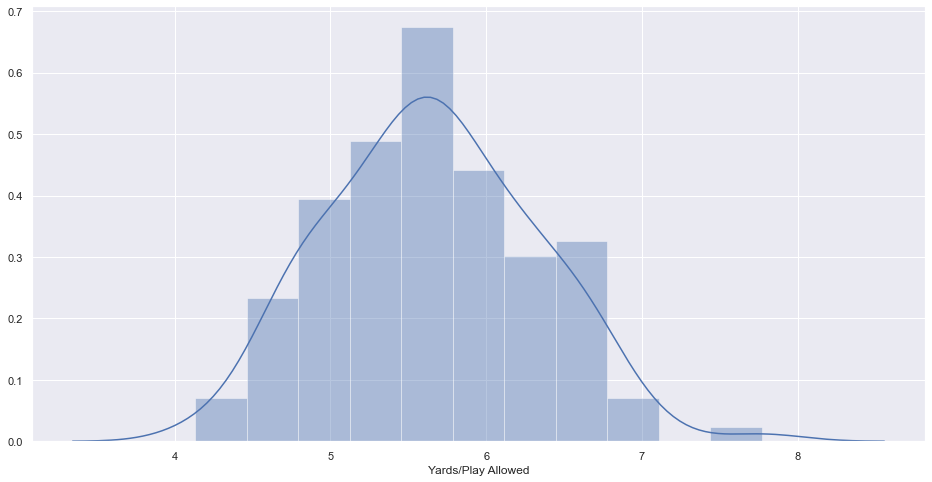

In [48]:
sns.distplot(defense['Yards/Play Allowed'])

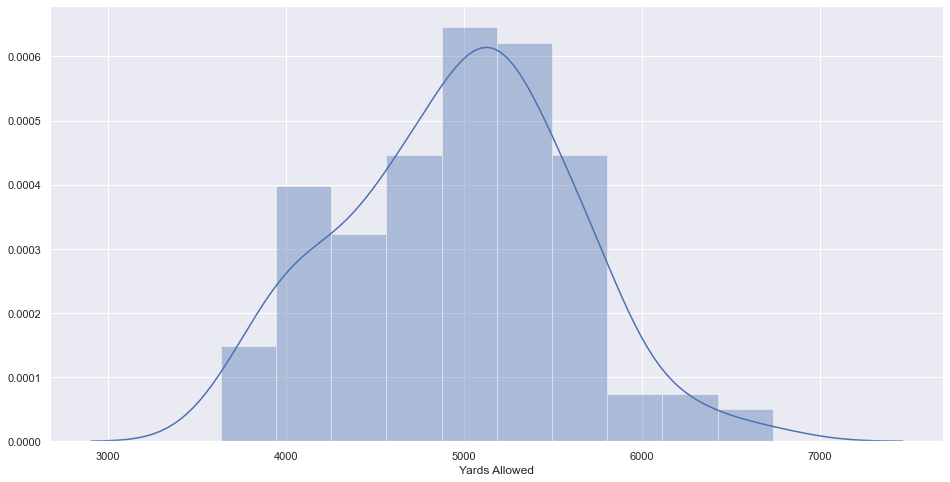

In [49]:
sns.distplot(defense['Yards Allowed'])

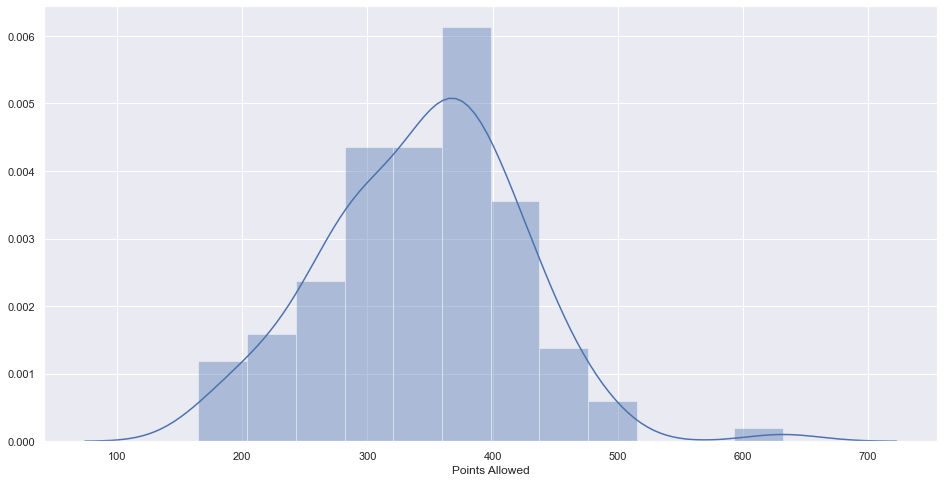

In [50]:
sns.distplot(defense['Points Allowed'])

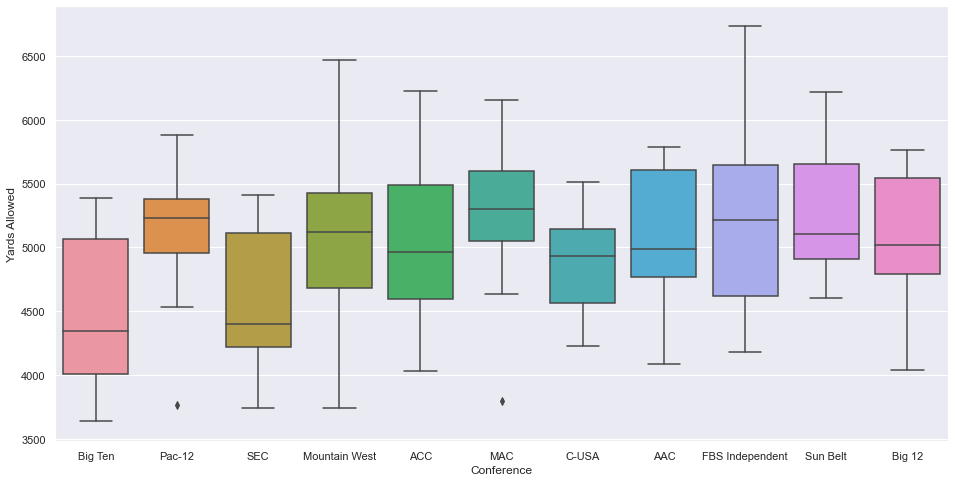

In [51]:
sns.boxplot(x='Conference',y='Yards Allowed',width=0.8,dodge=True,data=defense)

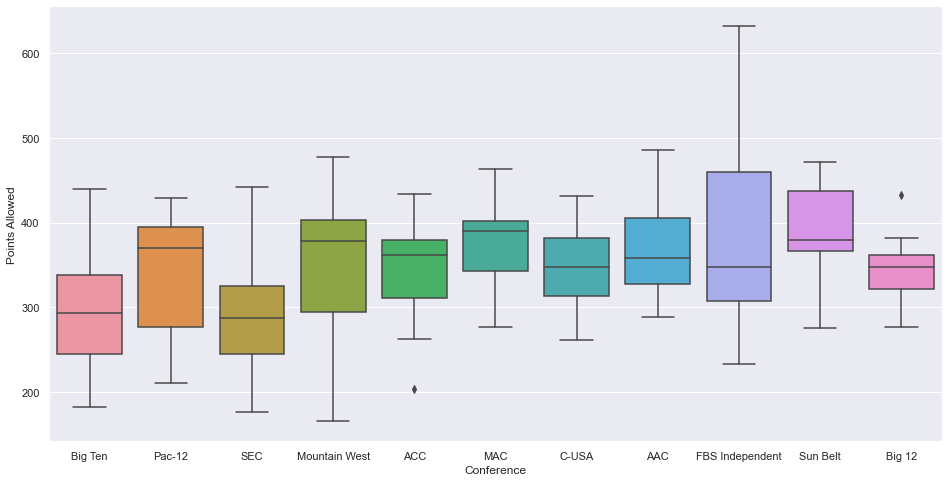

In [52]:
sns.boxplot(x='Conference',y='Points Allowed',width=0.8,dodge=True,data=defense)

In [53]:
special.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Team                                   130 non-null    object 
 1   Conference                             130 non-null    object 
 2   Win                                    130 non-null    int64  
 3   Loss                                   130 non-null    int64  
 4   Games                                  130 non-null    int64  
 5   Avg Rank                               130 non-null    float64
 6   Yard Diff Per Play                     130 non-null    float64
 7   Kickoff Return Def Rank                130 non-null    int64  
 8   Opp Kickoff Returns                    130 non-null    int64  
 9   Kickoff Touchbacks                     130 non-null    int64  
 10  Opponent Kickoff Return Yards          130 non-null    int64  
 11  Opp Ki

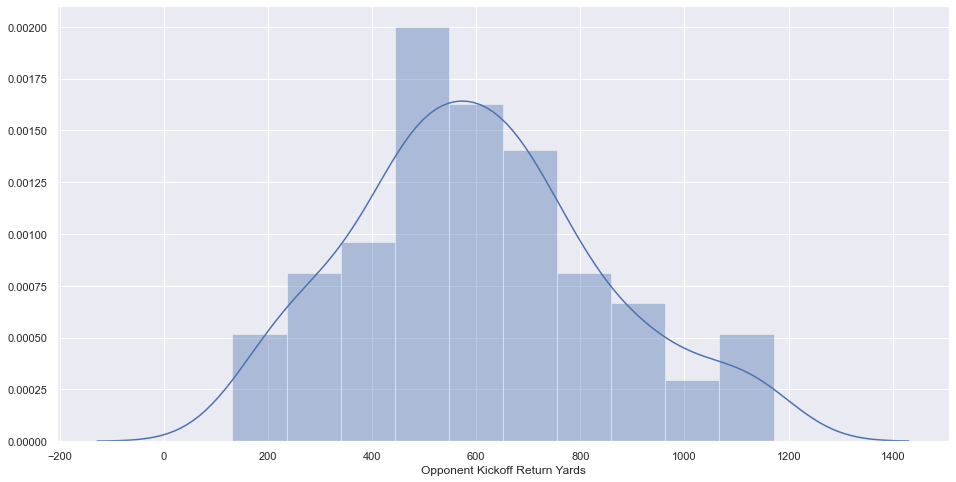

In [54]:
sns.distplot(special['Opponent Kickoff Return Yards'])

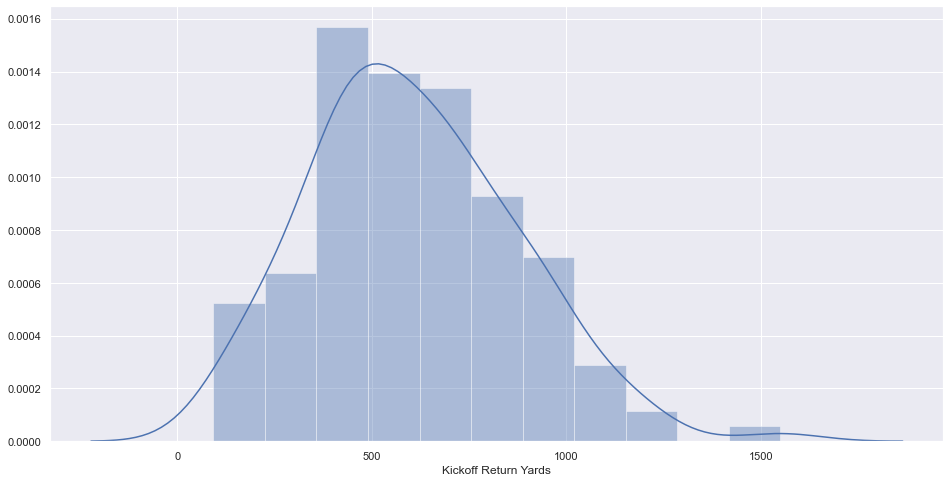

In [55]:
sns.distplot(special['Kickoff Return Yards'])

In [56]:
offense.loc[offense.Team.str.contains('Oregon')]

,Off Rank,Team,Conference,Win,Loss,Games,Avg Rank,Yard Diff Per Play,Off Plays,Off Yards,Off Yards/Play,Off TDs,Off Yards per Game,First Down Rank,First Down Runs,First Down Passes,First Down Penalties,First Downs,4th Down Rank,4th Attempts,4th Conversions,4th Percent,Passing Off Rank,Pass Attempts,Pass Completions,Interceptions Thrown.x,Pass Yards,Pass Yards/Attempt,Yards/Completion,Pass Touchdowns,Pass Yards Per Game,Redzone Off Rank,Redzone Attempts,Redzone Rush TD,Redzone Pass TD,Redzone Field Goals Made,Redzone Scores,Redzone Points,Rushing Off Rank,Rush Attempts,Rush Yds,Yards/Rush,Rushing TD,Rushing Yards per Game,Scoring Off Rank,Touchdowns,PAT,2 Point Conversions,Feild Goals,Safety,Total Points,Points Per Game,3rd Down Rank,3rd Attempts,3rd Conversions,3rd Percent,Time of Possession Rank,Time of Possession,Average Time of Possession per Game,Turnover Rank,Opponents Intercepted,Fumbles Lost,Interceptions Thrown.y,Turnovers Lost,Turnover Margin,Avg Turnover Margin per Game
82,40,Oregon,Pac-12,12,2,14,31.0,1.61,956,6063,6.34,61,433.1,13,124,170,26,320,73,13,25,0.520,41,446,298,6,3615,8.11,12.13,35,258.2,96,63,21,20,8,49,0.778,51,510,2448,4.80,26,174.9,16,67,64,1,9,0,495,35.4,44,177,74,0.418,103,395:35,28:15,5,20,5,6,11,16,1.14
83,58,Oregon St.,Pac-12,5,7,12,83.0,-0.10,830,4941,5.95,51,411.8,66,111,140,17,268,61,13,24,0.542,43,420,260,4,3061,7.29,11.77,30,255.1,11,39,16,17,3,36,0.923,70,410,1880,4.59,21,156.7,48,52,48,1,4,0,374,31.2,42,163,69,0.423,100,341:32,28:27,9,8,2,4,6,10,0.83


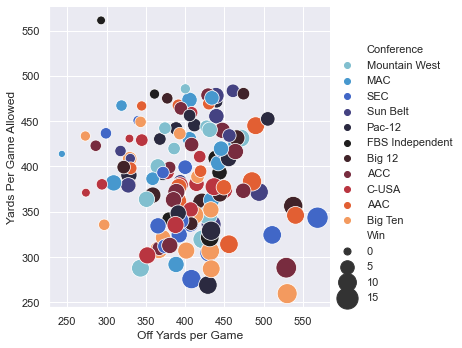

In [57]:
sns.relplot(x='Off Yards per Game', y = 'Yards Per Game Allowed', hue='Conference', size='Win',sizes=(50,450),palette="icefire",data=cfb)

In [58]:
grouped = cfb.groupby(['Conference'],as_index=False).sum()

In [59]:
grouped.drop(columns=['Off Rank','Off Yards/Play','Off Yards per Game','Def Rank','Yards/Play Allowed','Yards Per Game Allowed'],inplace=True)

In [60]:
grouped.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 0 to 10
Data columns (total 139 columns):
 #   Column                                 Dtype  
---  ------                                 -----  
 0   Conference                             object 
 1   Win                                    int64  
 2   Loss                                   int64  
 3   Games                                  int64  
 4   Off Plays                              int64  
 5   Off Yards                              int64  
 6   Off TDs                                int64  
 7   Def Plays                              int64  
 8   Yards Allowed                          int64  
 9   Off TDs Allowed                        int64  
 10  Total TDs Allowed                      int64  
 11  First Down Rank                        int64  
 12  First Down Runs                        int64  
 13  First Down Passes                      int64  
 14  First Down Penalties                   int64  
 15  First D

In [61]:
grouped.drop(columns=['First Down Rank','First Down Def Rank','Turnover Rank', 'Points Per Game','Sack Rank','Rushing Off Rank','Rushing Def Rank',
                     'Yds/Rush Allowed','Rush Yards Per Game Allowed'],inplace=True)

In [62]:
grouped.insert(loc=5,column='Off Yards/Play', value=grouped['Off Yards']/grouped['Off Plays'])

In [63]:
grouped.insert(loc=10,column='Yards/Play Allowed',value=grouped['Yards Allowed']/grouped['Def Plays'])

In [64]:
grouped.insert(loc=6,column='Off Yards/Game',value=grouped['Off Yards']/grouped['Games'])
grouped.insert(loc=11,column='Yards/Game Allowed',value=grouped['Yards Allowed']/grouped.Games)

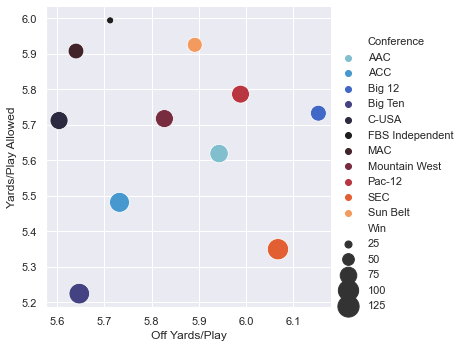

In [65]:
sns.relplot(x='Off Yards/Play', y = 'Yards/Play Allowed',hue='Conference',size='Win',sizes=(50,450),palette="icefire",data=grouped)

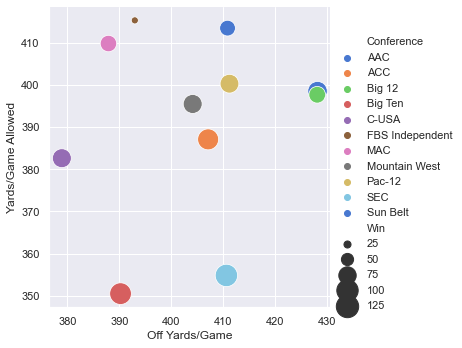

In [66]:
sns.relplot(x='Off Yards/Game', y = 'Yards/Game Allowed',hue='Conference',size='Win',sizes=(50,500),palette="muted",data=grouped)

In [67]:
grouped.sort_values('Win',ascending=False)

,Conference,Win,Loss,Games,Off Plays,Off Yards/Play,Off Yards/Game,Off Yards,Off TDs,Def Plays,Yards Allowed,Yards/Game Allowed,Yards/Play Allowed,Off TDs Allowed,Total TDs Allowed,First Down Runs,First Down Passes,First Down Penalties,First Downs,Opp First Down Runs,Opp First Down Passes,Opp First Down Penalties,Opp First Downs,4th Down Rank,4th Attempts,4th Conversions,4th Percent,4rd Down Def Rank,Opp 4th Conversion,Opp 4th Attempt,Opponent 4th Percent,Kickoff Return Def Rank,Opp Kickoff Returns,Kickoff Touchbacks,Opponent Kickoff Return Yards,Opp Kickoff Return Touchdowns Allowed,Avg Yards per Kickoff Return Allowed,Kickoff Return Rank,Kickoffs Returned,Kickoff Return Yards,Kickoff Return Touchdowns,Avg Yard per Kickoff Return,Passing Off Rank,Pass Attempts,Pass Completions,Interceptions Thrown.x,Pass Yards,Pass Yards/Attempt,Yards/Completion,Pass Touchdowns,Pass Yards Per Game,Pass Def Rank,Opp Completions Allowed,Opp Pass Attempts,Opp Pass Yds Allowed,Opp Pass TDs Allowed,Yards/Attempt Allowed,Yards/Completion Allowed,Pass Yards Per Game Allowed,Penalty Rank,Penalties,Penalty Yards,Penalty Yards Per Game,Punt Return Rank,Punt Returns,Net Punt Return Yards,Punt Return Touchdowns,Avg Yards Per Punt Return,Punt Return Def Rank,Opp Punt Returns,Opp Net Punt Return Yards,Opp Punt Return Touchdowns Allowed,Avg Yards Allowed per Punt Return,Redzone Def Rank,Opp Redzone Attempts,Opp Redzone Rush TD Allowed,Opp Redzone Pass Touchdowns Allowed,Opp Redzone Field Goals Made,Opp Redzone Scores,Redzone Points Allowed,Redzone Off Rank,Redzone Attempts,Redzone Rush TD,Redzone Pass TD,Redzone Field Goals Made,Redzone Scores,Redzone Points,Opp Rush Attempts,Opp Rush Yards Alloweed,Opp Rush Touchdowns Allowed,Rush Attempts,Rush Yds,Yards/Rush,Rushing TD,Rushing Yards per Game,Sacks,Sack Yards,Average Sacks per Game,Scoring Def Rank,Touchdowns Allowed,Opponent Extra Points,2 Point Conversions Allowed,Opp Deflected Extra Points,Opp Feild Goals Made,Opp Safety,Points Allowed,Avg Points per Game Allowed,Scoring Off Rank,Touchdowns,PAT,2 Point Conversions,Defensive Points,Feild Goals,Safety,Total Points,Tackle for Loss Rank,Solo Tackle For Loss,Assist Tackle For Loss,Tackle for Loss Yards,Total Tackle For Loss,Tackle For Loss Per Game,3rd Down Rank,3rd Attempts,3rd Conversions,3rd Percent,Time of Possession Rank,Fumbles Recovered,Opponents Intercepted,Turnovers Gain,Fumbles Lost,Interceptions Thrown.y,Turnovers Lost,Turnover Margin,Avg Turnover Margin per Game
9,SEC,107,73,180,12182,6.067559,410.638889,73915,640,11938,63866,354.811111,5.349807,472,504,1646,1843,337,3826,1377,1732,344,3453,941,131,260,7.075,561,115,262,6.108,770,275,639,5491,2,280.28,1077,275,5429,3,279.17,1022,5598,3385,122,41996,103.12,171.65,322,3228.9,677,3281,5648,38430,256,96.22,164.84,2994.9,910,1098,9644,748.93,597,255,2975,9,156.26,1153,209,2120,6,135.15,636,539,164,148,118,430,11.126,931,659,236,184,140,560,11.667,6290,25436,216,6584,31919,67.09,318,2479.3,416,2748,32.20,571,504,465,10,0,192,2,4089,321.0,933,678,635,8,0,223,2,5392,885,858,468,4404,1092,84.8,977,2396,947,5.540,903,110,153,263,108,122,230,33,2.38
3,Big Ten,102,77,179,12371,5.646674,390.251397,69855,614,12008,62739,350.497207,5.224767,494,521,1604,1784,306,3694,1402,1657,312,3371,890,146,278,7.379,814,139,278,6.862,712,408,446,8189,6,276.63,878,379,8052,7,298.83,1003,5348,3202,140,39849,103.66,173.30,293,3102.8,618,3144,5384,37439,245,97.56,166.94,2941.9,662,976,8740,682.84,1115,288,1977,2,95.12,556,224,1283,0,74.10,831,576,205,137,131,473,11.410,904,675,262,165,141,568,11.656,6624,25300,249,7023,30006,58.57,321,2329.2,452,2974,34.92,658,521,474,13,0,178,5,4170,330.3,929,651,605,11,0,198,8,5143,774,905,466,4639,1138,88.9,847,2522,1039,5.771,874,126,146,272,128,140,268,4,0.03
1,ACC,97,84,181,12856,5.731876,407.121547,73689,631,12780,70057,387.055249,5.481768,568,593,1615,1859,326,3800,1492,1798,352,3642,865,158,296,7.493,1099,161,290,7.876,1122,377,503,8222,4,304.47,809,408,9061,5,304.91,855,5754,3415,142,

In [68]:
pac12 = cfb.loc[cfb.Conference=='Pac-12']

In [69]:
pac12

,Team,Conference,Win,Loss,Games,Off Rank,Off Plays,Off Yards,Off Yards/Play,Off TDs,Off Yards per Game,Def Rank,Def Plays,Yards Allowed,Yards/Play Allowed,Off TDs Allowed,Total TDs Allowed,Yards Per Game Allowed,First Down Rank,First Down Runs,First Down Passes,First Down Penalties,First Downs,First Down Def Rank,Opp First Down Runs,Opp First Down Passes,Opp First Down Penalties,Opp First Downs,4th Down Rank,4th Attempts,4th Conversions,4th Percent,4rd Down Def Rank,Opp 4th Conversion,Opp 4th Attempt,Opponent 4th Percent,Kickoff Return Def Rank,Opp Kickoff Returns,Kickoff Touchbacks,Opponent Kickoff Return Yards,Opp Kickoff Return Touchdowns Allowed,Avg Yards per Kickoff Return Allowed,Kickoff Return Rank,Kickoffs Returned,Kickoff Return Yards,Kickoff Return Touchdowns,Avg Yard per Kickoff Return,Passing Off Rank,Pass Attempts,Pass Completions,Interceptions Thrown.x,Pass Yards,Pass Yards/Attempt,Yards/Completion,Pass Touchdowns,Pass Yards Per Game,Pass Def Rank,Opp Completions Allowed,Opp Pass Attempts,Opp Pass Yds Allowed,Opp Pass TDs Allowed,Yards/Attempt Allowed,Yards/Completion Allowed,Pass Yards Per Game Allowed,Penalty Rank,Penalties,Penalty Yards,Penalty Yards Per Game,Punt Return Rank,Punt Returns,Net Punt Return Yards,Punt Return Touchdowns,Avg Yards Per Punt Return,Punt Return Def Rank,Opp Punt Returns,Opp Net Punt Return Yards,Opp Punt Return Touchdowns Allowed,Avg Yards Allowed per Punt Return,Redzone Def Rank,Opp Redzone Attempts,Opp Redzone Rush TD Allowed,Opp Redzone Pass Touchdowns Allowed,Opp Redzone Field Goals Made,Opp Redzone Scores,Redzone Points Allowed,Redzone Off Rank,Redzone Attempts,Redzone Rush TD,Redzone Pass TD,Redzone Field Goals Made,Redzone Scores,Redzone Points,Rushing Def Rank,Opp Rush Attempts,Opp Rush Yards Alloweed,Yds/Rush Allowed,Opp Rush Touchdowns Allowed,Rush Yards Per Game Allowed,Rushing Off Rank,Rush Attempts,Rush Yds,Yards/Rush,Rushing TD,Rushing Yards per Game,Sack Rank,Sacks,Sack Yards,Average Sacks per Game,Scoring Def Rank,Touchdowns Allowed,Opponent Extra Points,2 Point Conversions Allowed,Opp Deflected Extra Points,Opp Feild Goals Made,Opp Safety,Points Allowed,Avg Points per Game Allowed,Scoring Off Rank,Touchdowns,PAT,2 Point Conversions,Defensive Points,Feild Goals,Safety,Total Points,Points Per Game,Tackle for Loss Rank,Solo Tackle For Loss,Assist Tackle For Loss,Tackle for Loss Yards,Total Tackle For Loss,Tackle For Loss Per Game,3rd Down Rank,3rd Attempts,3rd Conversions,3rd Percent,Time of Possession Rank,Time of Possession,Average Time of Possession per Game,Turnover Rank,Fumbles Recovered,Opponents Intercepted,Turnovers Gain,Fumbles Lost,Interceptions Thrown.y,Turnovers Lost,Turnover Margin,Avg Turnover Margin per Game
4,Arizona,Pac-12,4,8,12,30,873,5281,6.05,42,440.1,120,889,5657,6.36,53,54,471.4,63,111,139,20,270,116,122,145,26,293,19,13,20,0.650,5,6,18,0.333,95,10,48,222,0,22.20,57,34,716,0,21.06,35,422,261,12,3193,7.57,12.23,23,266.1,126,282,430,3478,26,8.09,12.33,289.8,79,76,677,56.42,83,14,89,0,6.36,70,19,152,0,8.00,118,53,22,11,15,48,0.906,53,35,12,10,8,30,0.857,88,459,2179,4.75,27,181.6,52,451,2088,4.63,19,174.0,111,17,93,1.42,118,54,52,1,0,17,0,429,35.8,77,42,37,1,0,10,1,323,26.9,120,43,22,175,54,4.5,28,186,82,0.441,115,328:53,27:24,89,4,11,15,6,12,18,-3,-0.25
5,Arizona St.,Pac-12,8,5,13,94,842,4837,5.74,34,372.1,67,928,5113,5.51,39,39,393.3,100,88,125,20,233,87,94,155,24,273,55,9,16,0.563,80,13,24,0.542,74,37,21,779,0,21.05,7,23,606,0,26.35,53,383,233,4,3235,8.45,13.88,21,248.8,115,296,465,3487,24,7.50,11.78,268.2,108,85,818,62.92,17,19,247,1,13.00,69,20,154,0,7.70,36,39,14,14,3,31,0.795,16,45,12,8,21,41,0.911,26,463,1626,3.51,15,125.1,115,459,1602,3.49,13,123.2,72,26,168,2.00,35,39,39,0,0,6,0,291,22.4,96,36,29,4,0,23,0,322,24.8,79,59,30,317,74,5.7,83,187,72,0.385,86,379:57,29:13,6,15,13,28,10,4,14,14,1.08
17,California,Pac-12,8,5,13,117,841,4271,5.08,35,328.5,65,945,5076,5.37,32,32,390.5,96,104,105,35,244,87,99,159,15,273,115,6,16,0.375,93,16,28,0.571,94,2

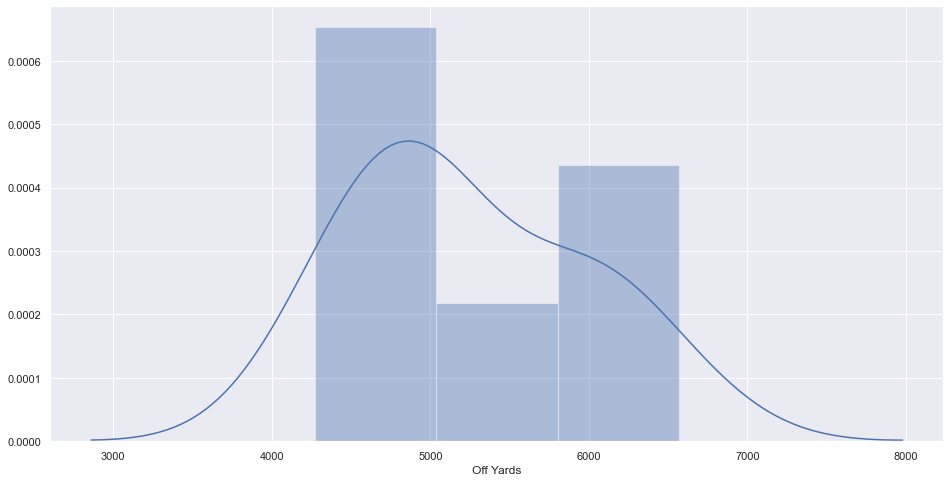

In [70]:
sns.distplot(pac12['Off Yards'])

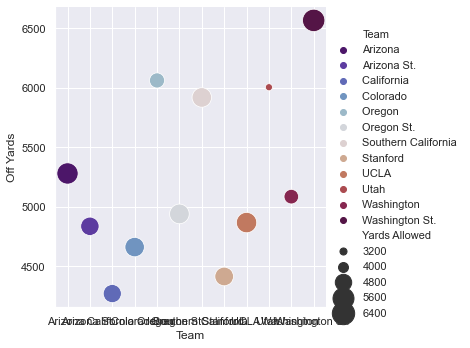

In [71]:
sns.set(rc={'figure.figsize': (16,8)})

sns.relplot(x='Team',y='Off Yards',hue='Team',size='Yards Allowed',sizes=(50,500),palette='twilight_shifted',data=pac12)

In [72]:
cfb.head(1)

,Team,Conference,Win,Loss,Games,Off Rank,Off Plays,Off Yards,Off Yards/Play,Off TDs,Off Yards per Game,Def Rank,Def Plays,Yards Allowed,Yards/Play Allowed,Off TDs Allowed,Total TDs Allowed,Yards Per Game Allowed,First Down Rank,First Down Runs,First Down Passes,First Down Penalties,First Downs,First Down Def Rank,Opp First Down Runs,Opp First Down Passes,Opp First Down Penalties,Opp First Downs,4th Down Rank,4th Attempts,4th Conversions,4th Percent,4rd Down Def Rank,Opp 4th Conversion,Opp 4th Attempt,Opponent 4th Percent,Kickoff Return Def Rank,Opp Kickoff Returns,Kickoff Touchbacks,Opponent Kickoff Return Yards,Opp Kickoff Return Touchdowns Allowed,Avg Yards per Kickoff Return Allowed,Kickoff Return Rank,Kickoffs Returned,Kickoff Return Yards,Kickoff Return Touchdowns,Avg Yard per Kickoff Return,Passing Off Rank,Pass Attempts,Pass Completions,Interceptions Thrown.x,Pass Yards,Pass Yards/Attempt,Yards/Completion,Pass Touchdowns,Pass Yards Per Game,Pass Def Rank,Opp Completions Allowed,Opp Pass Attempts,Opp Pass Yds Allowed,Opp Pass TDs Allowed,Yards/Attempt Allowed,Yards/Completion Allowed,Pass Yards Per Game Allowed,Penalty Rank,Penalties,Penalty Yards,Penalty Yards Per Game,Punt Return Rank,Punt Returns,Net Punt Return Yards,Punt Return Touchdowns,Avg Yards Per Punt Return,Punt Return Def Rank,Opp Punt Returns,Opp Net Punt Return Yards,Opp Punt Return Touchdowns Allowed,Avg Yards Allowed per Punt Return,Redzone Def Rank,Opp Redzone Attempts,Opp Redzone Rush TD Allowed,Opp Redzone Pass Touchdowns Allowed,Opp Redzone Field Goals Made,Opp Redzone Scores,Redzone Points Allowed,Redzone Off Rank,Redzone Attempts,Redzone Rush TD,Redzone Pass TD,Redzone Field Goals Made,Redzone Scores,Redzone Points,Rushing Def Rank,Opp Rush Attempts,Opp Rush Yards Alloweed,Yds/Rush Allowed,Opp Rush Touchdowns Allowed,Rush Yards Per Game Allowed,Rushing Off Rank,Rush Attempts,Rush Yds,Yards/Rush,Rushing TD,Rushing Yards per Game,Sack Rank,Sacks,Sack Yards,Average Sacks per Game,Scoring Def Rank,Touchdowns Allowed,Opponent Extra Points,2 Point Conversions Allowed,Opp Deflected Extra Points,Opp Feild Goals Made,Opp Safety,Points Allowed,Avg Points per Game Allowed,Scoring Off Rank,Touchdowns,PAT,2 Point Conversions,Defensive Points,Feild Goals,Safety,Total Points,Points Per Game,Tackle for Loss Rank,Solo Tackle For Loss,Assist Tackle For Loss,Tackle for Loss Yards,Total Tackle For Loss,Tackle For Loss Per Game,3rd Down Rank,3rd Attempts,3rd Conversions,3rd Percent,Time of Possession Rank,Time of Possession,Average Time of Possession per Game,Turnover Rank,Fumbles Recovered,Opponents Intercepted,Turnovers Gain,Fumbles Lost,Interceptions Thrown.y,Turnovers Lost,Turnover Margin,Avg Turnover Margin per Game
0,Air Force,Mountain West,11,2,13,51,881,5483,6.22,55,421.8,17,752,4155,5.53,32,34,319.6,45,227,52,7,286,9,77,131,8,216,5,16,21,0.762,44,13,28,0.464,82,36,26,772,0,21.44,129,7,93,0,13.29,125,126,68,6,1602,12.71,23.56,14,123.2,51,238,377,2848,21,7.55,11.97,219.1,2,42,368,28.31,129,5,6,0,1.2,27,7,38,0,5.43,9,43,10,13,8,31,0.721,33,54,39,0,9,48,0.889,7,375,1307,3.49,11,100.5,2,755,3881,5.14,41,298.5,72,26,168,2.0,20,34,27,0,0,9,0,258,19.8,21,58,52,1,1,13,0,443,34.1,125,37,34,247,54,4.2,2,157,84,0.535,2,448:07,34:28,78,9,7,16,12,6,18,-2,-0.15


In [73]:
cfb.insert(loc=5,column='Win Pct',value=cfb.Win/cfb.Games)

In [74]:
# sns.pairplot(dataframe, plot_kws = {"color": "green"})
# sns.pairp#sns.pairplot(dataframe[['Revenue','Visitors','Marketing Spend', 'Promo']], 
#              hue = 'Promo', palette = ['green', 'red', 'blue'], height = 10)
# (d[['Revenue','Visitors','Marketing Spend', 'Promo']], 
#              hue = 'Promo', palette = ['green', 'red', 'blue'], height = 10)


In [77]:
cfb.to_csv('CFB.csv',index=False)

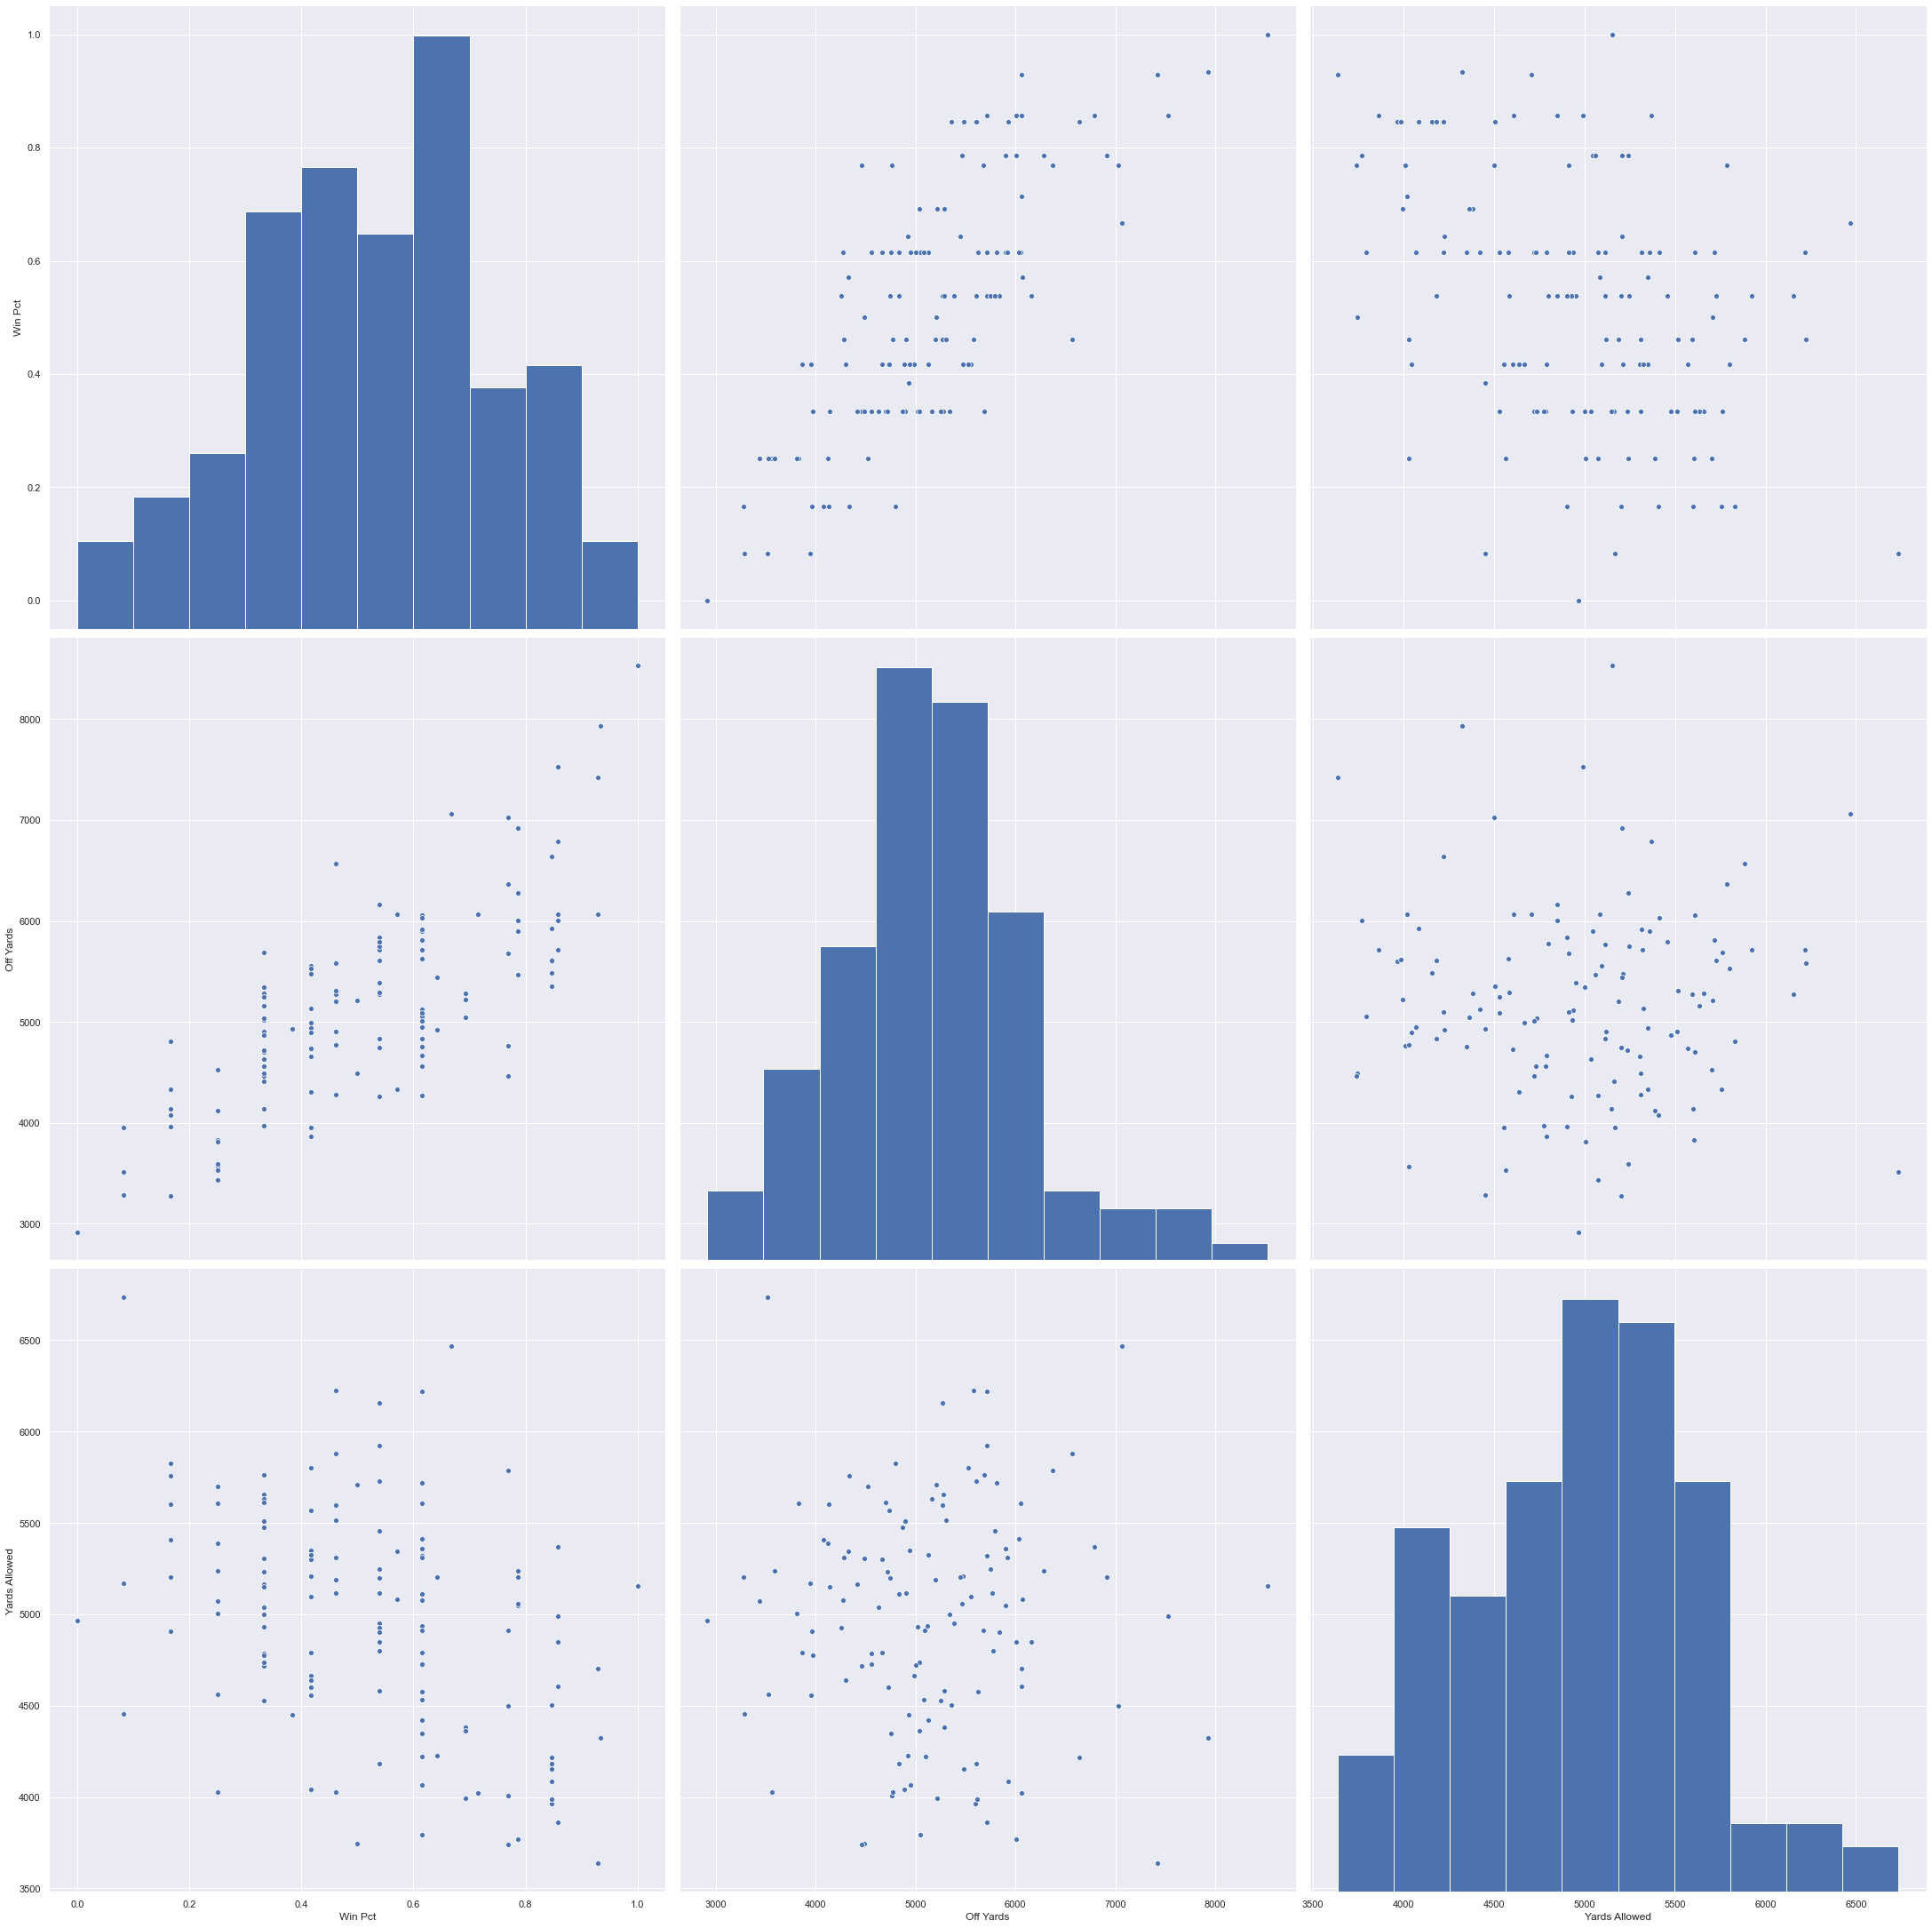

In [75]:
sns.pairplot(cfb[['Win Pct','Off Yards','Yards Allowed']], 
            palette = ['green', 'red', 'blue'], height = 10)
